## 11.5 Homework

#### 1, Monte Carlo Integral

Calculate the area shaded 
![Homework](https://raw.githubusercontent.com/qzhu2017/2017-cmp/master/img/MC1.png)

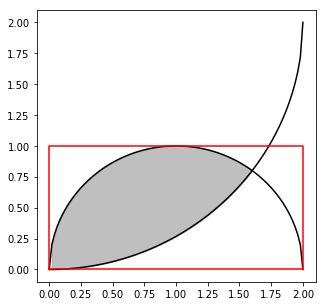

area in shaded region = 0.961926


In [15]:
import matplotlib.pyplot as plt
from math import sin
from random import random
import numpy as np
%matplotlib inline  


f1 = lambda x: np.sqrt(1-(x-1)**2)
f2 = lambda x: 2-np.sqrt(4-x**2)

x = np.linspace(0,2,100)

def MC(N,f1,f2):
    count = 0
    for i in range(N):
        x = 2*random()
        y = random()
        if y<f1(x) and y >f2(x):
            count += 1
    I = 2*count/N
    k = count/N
    return (k,I)

plt.figure(figsize = (5,5))
plt.plot(x,f1(x),'k')
plt.plot(x,f2(x),'k')
plt.plot([0,0,2,2,0],[0,1,1,0,0],'r')
plt.fill_between(x, f1(x), f2(x), where=f1(x)>f2(x), color='grey', alpha='0.5')
plt.show()

print('area in shaded region = ' + str(MC(1000000,f1,f2)[1]))

#### 2, Error Analysis
Try to do the intergral many times (100) for different $N$ values (100, 1000, 10000, 100000), collect the data and calculate its standard varaince.

In [16]:
N = [100,1000,10000,100000]

for i in N:
    areas = []
    successes = []
    variance = []
    for j in range(100):
        successes.append(MC(i,f1,f2)[0])
        areas.append(MC(i,f1,f2)[1])
        variance.append(np.sqrt(((successes[j]/i)*(1-(successes[j]/i)))/i))
    print('average variance for N = ' + str(i) + ': ' + str(np.average(variance)))
    

average variance for N = 100: 0.006916015211949309
average variance for N = 1000: 0.0006919146205186563
average variance for N = 10000: 6.931808678253807e-05
average variance for N = 100000: 6.933955804524616e-06


### as N increases, accuracy of the area increases. 